In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import pickle

In [2]:
customer_data_df = pd.read_csv("../Data/pre_processed_data_1.csv", sep = "\t")
customer_data_df

,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Days_Customer,Related,Single,Unrelated,Post-Graduate,Under-Graduate
0,58138.0,1,0,1617,1,25,65,3668,0.0,1.0,0.0,1.0,0.0
1,46344.0,0,2,27,0,6,68,2822,0.0,1.0,0.0,1.0,0.0
2,71613.0,0,0,776,0,21,57,3169,1.0,0.0,0.0,1.0,0.0
3,26646.0,0,1,53,0,8,38,2762,1.0,0.0,0.0,1.0,0.0
4,58293.0,0,1,422,0,19,41,3018,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,1341,0,18,55,3238,1.0,0.0,0.0,1.0,0.0
2236,64014.0,0,3,444,1,22,76,2758,1.0,0.0,0.0,1.0,0.0
2237,56981.0,0,0,1241,1,19,41,3012,0.0,1.0,0.0,1.0,0.0
2238,69245.0,0,1,843,0,23,66,3013,1.0,0.0,0.0,1.0,0.0


In [3]:
X = customer_data_df.drop('Response', axis = 1)
y = customer_data_df['Response']

In [4]:
xdev, xtest, ydev, ytest = train_test_split(X, y, stratify = y, test_size=0.2)

In [5]:
ss = StandardScaler()
xdev = ss.fit_transform(xdev)
xtest = ss.transform(xtest)

In [6]:
ytest_original = ytest
ydev = to_categorical(ydev, 2)
ytest = to_categorical(ytest, 2)

In [7]:
print(xdev.shape)
print(ydev.shape)

(1792, 12)
(1792, 2)


In [8]:
def create_model(optimizer):
  model = Sequential([
      layers.Dense(128, input_shape=(12,)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(64),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(32),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(2, activation = 'sigmoid')
  ])
  optimizer = optimizer
  model.compile(optimizer= optimizer,
                loss="binary_crossentropy",
                metrics=['accuracy'])
  return model

clf = KerasClassifier(create_model, epochs = 42)
param_grid = {'batch_size':[32, 64, 128], 
              'optimizer':['adam', 'SGD']}
grid = GridSearchCV(clf, param_grid = param_grid, cv = 3)
history = grid.fit(xdev, ydev)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/42
38/38 [==============================] - 3s 5ms/step - loss: 0.4648 - accuracy: 0.8727
Epoch 2/42
38/38 [==============================] - 0s 5ms/step - loss: 0.2919 - accuracy: 0.9347
Epoch 3/42
38/38 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9422
Epoch 4/42
38/38 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.9481
Epoch 5/42
38/38 [==============================] - 0s 4ms/step - loss: 0.1571 - accuracy: 0.9489
Epoch 6/42
38/38 [==============================] - 0s 5ms/step - loss: 0.1496 - accuracy: 0.9430
Epoch 7/42
38/38 [==============================] - 0s 5ms/step - loss: 0.1332 - accuracy: 0.9497
Epoch 8/42
38/38 [==============================] - 0s 5ms/step - loss: 0.1242 - accuracy: 0.9556
Epoch 9/42
38/38 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9464
Epoch 10/42
38/38 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9531
Epoch 11/42
38/38 [

In [9]:
best_index = history.cv_results_['rank_test_score'][0]
history.cv_results_['params'][best_index-1]

{'batch_size': 32, 'optimizer': 'SGD'}

In [10]:
model = Sequential([
    layers.Dense(128, input_shape=(12,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(2, activation = 'sigmoid')
])
optimizer = 'SGD'
model.compile(optimizer= optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])
history = model.fit(
  xdev,
  ydev,
  epochs = 30,
  batch_size = 32,
  validation_split = 0.2
)

Epoch 1/30
45/45 [==============================] - 4s 29ms/step - loss: 0.7505 - accuracy: 0.5820 - val_loss: 0.6220 - val_accuracy: 0.8774
Epoch 2/30
45/45 [==============================] - 0s 5ms/step - loss: 0.5186 - accuracy: 0.8709 - val_loss: 0.5236 - val_accuracy: 0.9109
Epoch 3/30
45/45 [==============================] - 0s 6ms/step - loss: 0.4048 - accuracy: 0.9114 - val_loss: 0.4426 - val_accuracy: 0.9248
Epoch 4/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3384 - accuracy: 0.9253 - val_loss: 0.3739 - val_accuracy: 0.9220
Epoch 5/30
45/45 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.9260 - val_loss: 0.3201 - val_accuracy: 0.9220
Epoch 6/30
45/45 [==============================] - 0s 7ms/step - loss: 0.2657 - accuracy: 0.9323 - val_loss: 0.2800 - val_accuracy: 0.9248
Epoch 7/30
45/45 [==============================] - 0s 6ms/step - loss: 0.2510 - accuracy: 0.9274 - val_loss: 0.2491 - val_accuracy: 0.9276
Epoch 8/30
45/45 [=

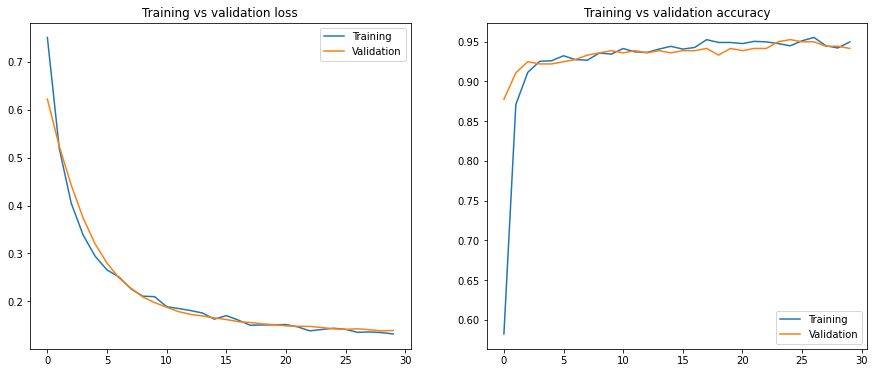

In [11]:
def plotAccLoss(history, epoch):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(range(epoch), loss, label='Training')
  plt.plot(range(epoch), val_loss, label='Validation')
  plt.legend()
  plt.title('Training vs validation loss')

  plt.subplot(1, 2, 2)
  plt.plot(range(epoch), acc, label='Training')
  plt.plot(range(epoch), val_acc, label='Validation')
  plt.legend()
  plt.title('Training vs validation accuracy')
  plt.show()

plotAccLoss(history, epoch = 30)

In [12]:
metrics = model.evaluate(xtest, ytest)

14/14 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9219


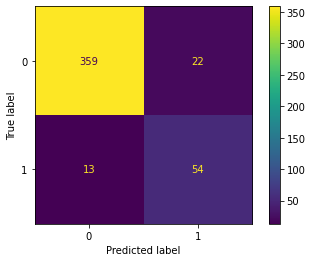

In [13]:
ytest_prob = model.predict(xtest)
ytest_pred = np.array([x[-1] for x in np.argsort(ytest_prob, axis=1)])
mcm = confusion_matrix(ytest_original, ytest_pred)
disp = ConfusionMatrixDisplay(mcm)
disp.plot()

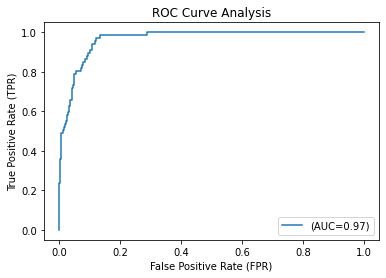

In [14]:
fpr, tpr, thresholds = roc_curve(ytest_original, ytest_prob[:,-1], pos_label = 1)
auc = roc_auc_score(ytest_original, ytest_prob[:,-1])
plt.plot(fpr, tpr, label = "(AUC={:.2f})".format(auc))

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Analysis")
plt.legend(loc = "lower right")
plt.show()

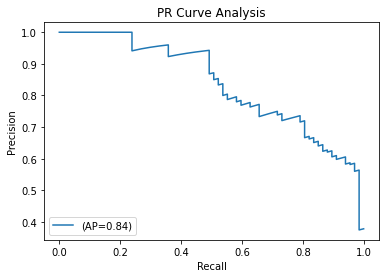

In [15]:
precision, recall, thresholds = precision_recall_curve(ytest_original, ytest_prob[:,-1], pos_label = 1)
ap = average_precision_score(ytest_original, ytest_prob[:,-1],)
plt.plot(recall, precision, label = "(AP={:.2f})".format(ap))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve Analysis")
plt.legend(loc = "lower left")
plt.show()

In [16]:
model_name_saved = "NeuralNetClfWoSmote.pkl"
with open(model_name_saved, 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://67c02958-045b-4273-a471-c4ec7ed41d7c/assets


Deploy SMOTE on development set.

In [17]:
X = customer_data_df.drop('Response', axis = 1)
y = customer_data_df['Response']

xdev, xtest, ydev, ytest = train_test_split(X, y, stratify = y, test_size=0.2)

ss = StandardScaler()
xdev = ss.fit_transform(xdev)
xtest = ss.transform(xtest)

smote = SMOTE(random_state = 42)
xdev, ydev = smote.fit_resample(xdev, ydev)

ytest_original = ytest
ydev = to_categorical(ydev, 2)
ytest = to_categorical(ytest, 2)

In [18]:
print(xdev.shape)
print(ydev.shape)

(3050, 12)
(3050, 2)


In [19]:
clf = KerasClassifier(create_model, epochs = 42)
param_grid = {'batch_size':[32, 64, 128], 
              'optimizer':['adam', 'SGD']}
grid = GridSearchCV(clf, param_grid = param_grid, cv = 3)
history = grid.fit(xdev, ydev)

Epoch 1/42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


64/64 [==============================] - 2s 5ms/step - loss: 0.3921 - accuracy: 0.8839
Epoch 2/42
64/64 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9557
Epoch 3/42
64/64 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9547
Epoch 4/42
64/64 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9503
Epoch 5/42
64/64 [==============================] - 0s 3ms/step - loss: 0.1304 - accuracy: 0.9597
Epoch 6/42
64/64 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9557
Epoch 7/42
64/64 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9577
Epoch 8/42
64/64 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9636
Epoch 9/42
64/64 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9611
Epoch 10/42
64/64 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9675
Epoch 11/42
64/64 [===========

In [21]:
best_index = history.cv_results_['rank_test_score'][0]
history.cv_results_['params'][best_index-1]

{'batch_size': 32, 'optimizer': 'SGD'}

In [22]:
model = Sequential([
    layers.Dense(128, input_shape=(12,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(2, activation = 'sigmoid')
])
optimizer = 'SGD'
model.compile(optimizer= optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])
history = model.fit(
  xdev,
  ydev,
  epochs = 30,
  batch_size = 32,
  validation_split=0.2
)

Epoch 1/30
77/77 [==============================] - 1s 6ms/step - loss: 0.6344 - accuracy: 0.6996 - val_loss: 0.5051 - val_accuracy: 0.9754
Epoch 2/30
77/77 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8975 - val_loss: 0.3942 - val_accuracy: 0.9574
Epoch 3/30
77/77 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.9135 - val_loss: 0.3341 - val_accuracy: 0.9492
Epoch 4/30
77/77 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.9160 - val_loss: 0.2860 - val_accuracy: 0.9557
Epoch 5/30
77/77 [==============================] - 0s 3ms/step - loss: 0.2741 - accuracy: 0.9172 - val_loss: 0.2588 - val_accuracy: 0.9541
Epoch 6/30
77/77 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9205 - val_loss: 0.2272 - val_accuracy: 0.9607
Epoch 7/30
77/77 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9217 - val_loss: 0.2108 - val_accuracy: 0.9623
Epoch 8/30
77/77 [==

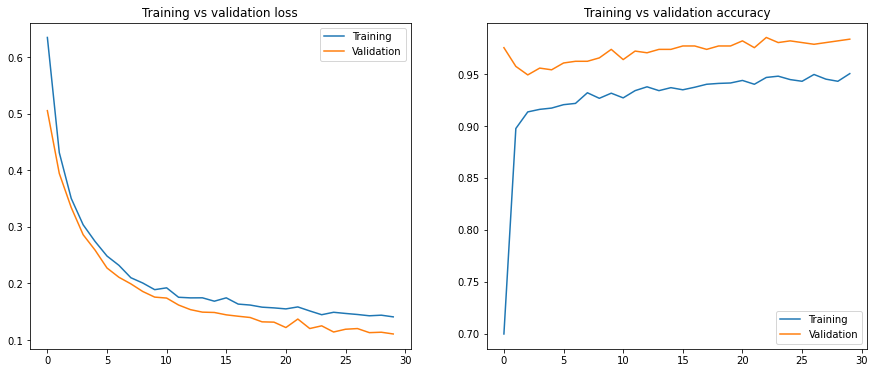

In [23]:
plotAccLoss(history, epoch = 30)

In [24]:
metrics = model.evaluate(xtest, ytest)

14/14 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9330


In [25]:
model_name_saved = "NeuralNetClfWithSmote.pkl"
with open(model_name_saved, 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://61353796-a297-410a-a1c9-6e0ab8a23647/assets


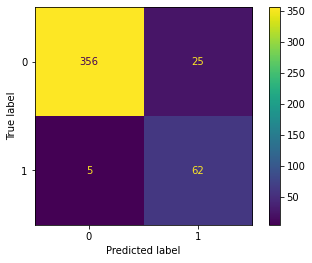

In [26]:
ytest_prob = model.predict(xtest)
ytest_pred = np.array([x[-1] for x in np.argsort(ytest_prob, axis=1)])
mcm = confusion_matrix(ytest_original, ytest_pred)
disp = ConfusionMatrixDisplay(mcm)
disp.plot()

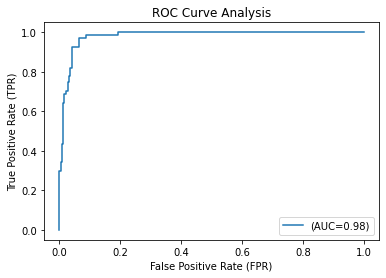

In [27]:
fpr, tpr, thresholds = roc_curve(ytest_original, ytest_prob[:,-1], pos_label = 1)
auc = roc_auc_score(ytest_original, ytest_prob[:,-1])
plt.plot(fpr, tpr, label = "(AUC={:.2f})".format(auc))

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Analysis")
plt.legend(loc = "lower right")
plt.show()

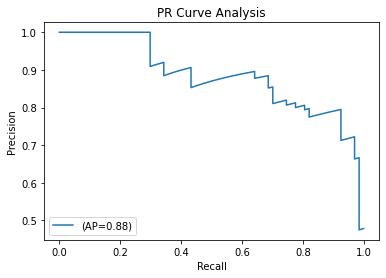

In [28]:
precision, recall, thresholds = precision_recall_curve(ytest_original, ytest_prob[:,-1], pos_label = 1)
ap = average_precision_score(ytest_original, ytest_prob[:,-1],)
plt.plot(recall, precision, label = "(AP={:.2f})".format(ap))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve Analysis")
plt.legend(loc = "lower left")
plt.show()

The model overfits after applying SMOTE here. We could resolve this issue by using batch normalization or dropout layers but we are going to leave it here for now.